In [2]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
# from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
# import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
# sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [40]:
airbnb_data = pd.DataFrame(pd.read_csv("calendar_detail.csv"))

In [41]:
airbnb_data.head()

,listing_id,date,available,price
0,2515,2018-10-01,t,$99.00
1,2515,2018-09-30,t,$89.00
2,2515,2018-09-29,t,$99.00
3,2515,2018-09-28,t,$99.00
4,2515,2018-09-27,t,$99.00


In [74]:
missing = airbnb_data.isnull().sum(axis=0).reset_index()
missing.columns = ['column_name', 'missing_count']
missing['filling_factor'] = (airbnb_data.shape[0]- missing['missing_count']) / airbnb_data.shape[0] * 100
missing.sort_values('filling_factor').reset_index(drop = True)

,column_name,missing_count,filling_factor
0,price,10600264,34.496077
1,listing_id,0,100.000000
2,date,0,100.000000
3,available,0,100.000000


In [42]:
airbnb_data.fillna(0, inplace=True)
airbnb_data.shape

(16182640, 4)

In [43]:
print (len(airbnb_data[airbnb_data.price == 0]))

10600264


In [46]:
airbnb_data = airbnb_data[airbnb_data.price != 0]
airbnb_data.shape

(5582376, 4)

In [47]:
cost = airbnb_data['price']

In [49]:
import re
prices=[]

for c in cost:
    c = re.sub('[^0-9.]+','', c)
    prices.append(float(c))
    
airbnb_data['price']=prices  

,listing_id,date,available,price
0,2515,2018-10-01,t,99.0
1,2515,2018-09-30,t,89.0
2,2515,2018-09-29,t,99.0
3,2515,2018-09-28,t,99.0
4,2515,2018-09-27,t,99.0
5,2515,2018-09-26,t,99.0
6,2515,2018-09-25,t,99.0
7,2515,2018-09-24,t,99.0
8,2515,2018-09-23,t,99.0
9,2515,2018-09-22,t,99.0


In [52]:
#split the date col as date, month and day for analysis
airbnb_data['Year'],airbnb_data['Month'],airbnb_data['Day']=airbnb_data['date'].str.split('-',2).str

airbnb_data.head()

,listing_id,date,available,price,Year,Month,Day
0,2515,2018-10-01,t,99.0,2018,10,01
1,2515,2018-09-30,t,89.0,2018,09,30
2,2515,2018-09-29,t,99.0,2018,09,29
3,2515,2018-09-28,t,99.0,2018,09,28
4,2515,2018-09-27,t,99.0,2018,09,27


In [11]:
print (airbnb_data['price'].unique())

[  99.   89.   79. ...   16. 1008. 1003.]


In [53]:
ydf = airbnb_data.groupby(['Year','Month']).price.mean()
ydf = ydf.reset_index()
ydf = ydf.rename(columns = {'price':'mean_price'})
ydf['year-Month']=ydf['Year'].map(str) + "-" + ydf['Month'].map(str)
ydf.head()

,Year,Month,mean_price,year-Month
0,2017,10,177.907201,2017-10
1,2017,11,164.961332,2017-11
2,2017,12,168.393642,2017-12
3,2018,01,160.693973,2018-01
4,2018,02,160.583151,2018-02


Text(0,0.5,'Average Price')

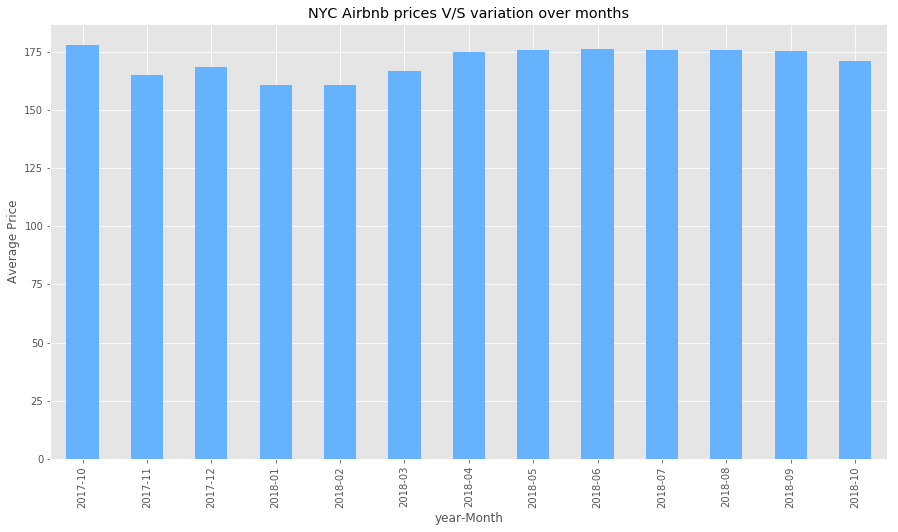

In [55]:
#Plot the above details on Graph as Bar Charts

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

objects = ydf['year-Month']
y_pos = ydf['mean_price']

ydf.plot(kind='bar', 
           x='year-Month',
           y='mean_price',
           color = '#67b2fe', 
           figsize =(15,8), 
           title = 'NYC Airbnb prices V/S variation over months', 
           legend = False)
plt.ylabel('Average Price')

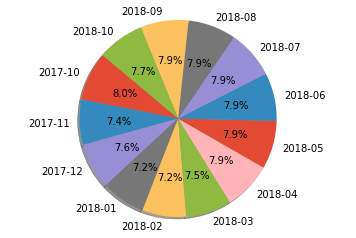

In [57]:
import matplotlib.pyplot as plt
 
# Data to plot
y_pos = ydf['mean_price'] 
objects = ydf['year-Month']
# Plot
plt.pie(y_pos, labels=objects, autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [58]:
from datetime import date
import datetime
import calendar
import holidays

In [59]:
airbnb_data.fillna(0, inplace=True)
us_holidays = holidays.US()

airbnb_data['day']='default'
airbnb_data['holiday']='False'
airbnb_data['us_holidays']='working'

In [60]:
for index, row in airbnb_data.iterrows():
    sdate = datetime.date(int(row['Year']),int(row['Month']),int(row['Day']))
    vall=date(int(row['Year']),int(row['Month']),int(row['Day'])) in us_holidays
    airbnb_data.set_value(index,'day',calendar.day_name[sdate.weekday()])
    airbnb_data.set_value(index,'holiday',vall)
    airbnb_data.set_value(index,'us_holidays',us_holidays.get(sdate))

In [61]:
airbnb_data.head()

,listing_id,date,available,price,Year,Month,Day,day,holiday,us_holidays
0,2515,2018-10-01,t,99.0,2018,10,01,Monday,False,None
1,2515,2018-09-30,t,89.0,2018,09,30,Sunday,False,None
2,2515,2018-09-29,t,99.0,2018,09,29,Saturday,False,None
3,2515,2018-09-28,t,99.0,2018,09,28,Friday,False,None
4,2515,2018-09-27,t,99.0,2018,09,27,Thursday,False,None


In [62]:
#Analysis of Average price over week

dDf=airbnb_data.groupby('day').price.mean()
dDf=dDf.reset_index()
dDf['day_num']=0

for index,row in dDf.iterrows():
    if row['day']=='Monday':
        dDf.set_value(index,'day_num',1)
    if row['day']=='Tuesday':
        dDf.set_value(index,'day_num',2)
    if row['day']=='Wednesday':
        dDf.set_value(index,'day_num',3)
    if row['day']=='Thursday':
        dDf.set_value(index,'day_num',4)
    if row['day']=='Friday':
        dDf.set_value(index,'day_num',5)
    if row['day']=='Saturday':
        dDf.set_value(index,'day_num',6)
    if row['day']=='Sunday':
        dDf.set_value(index,'day_num',7)
dDf=dDf.sort_values('day_num',ascending=[1])
dDf=dDf.rename(columns={'price':'Average_Price'})
dDf

,day,Average_Price,day_num
1,Monday,168.684574,1
5,Tuesday,168.373545,2
6,Wednesday,168.195359,3
4,Thursday,168.297459,4
0,Friday,174.693332,5
2,Saturday,174.902118,6
3,Sunday,169.176612,7


Text(0,0.5,'Average Price')

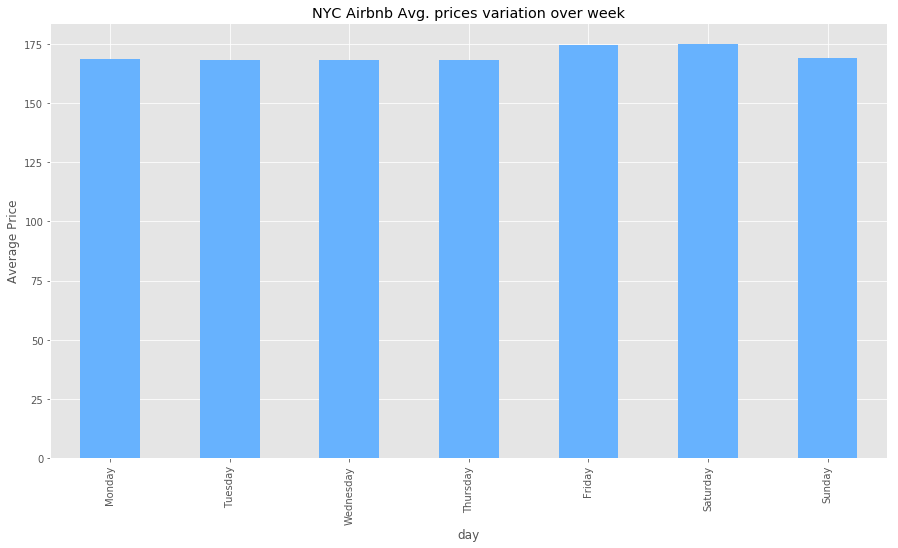

In [64]:
#Vizualize avg. price variation over a week
import matplotlib.pyplot as plt
# %matplotlib inline

# matplotlib.style.use('ggplot')

objects = dDf['day']
y_pos = dDf['Average_Price']

dDf.plot(kind='bar', 
           x='day',
           y='Average_Price',
           color = '#67b2fe', 
           figsize =(15,8), 
           title = 'NYC Airbnb Avg. prices variation over week', 
           legend = False)
plt.ylabel('Average Price')



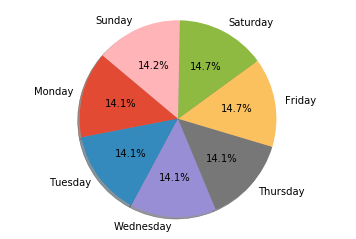

In [65]:
# Plot
plt.pie(y_pos, labels=objects, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [66]:
#Analysis of avg. price during holidays

holDf=airbnb_data.groupby('us_holidays').listing_id.count()
holDf=holDf.reset_index()
holDf=holDf.sort_values('listing_id',ascending=[0])
holDf

,us_holidays,listing_id
10,Washington's Birthday,18289
4,"Martin Luther King, Jr. Day",17774
0,Christmas Day,17377
7,Thanksgiving,16116
8,Veterans Day,15556
9,Veterans Day (Observed),15327
3,Labor Day,14820
2,Independence Day,14560
5,Memorial Day,14451
6,New Year's Day,13522


In [67]:
holPriceDf=airbnb_data.groupby('us_holidays').price.mean()
holPriceDf=holPriceDf.reset_index()
holPriceDf=holPriceDf.sort_values('price',ascending=[0])

holPriceDf.head(10)

,us_holidays,price
6,New Year's Day,190.107307
1,Columbus Day,183.851520
0,Christmas Day,176.156299
5,Memorial Day,174.246142
2,Independence Day,173.944437
3,Labor Day,173.375641
9,Veterans Day (Observed),169.133425
8,Veterans Day,168.584983
7,Thanksgiving,164.630926
10,Washington's Birthday,159.569632


Text(0,0.5,'Average Price')

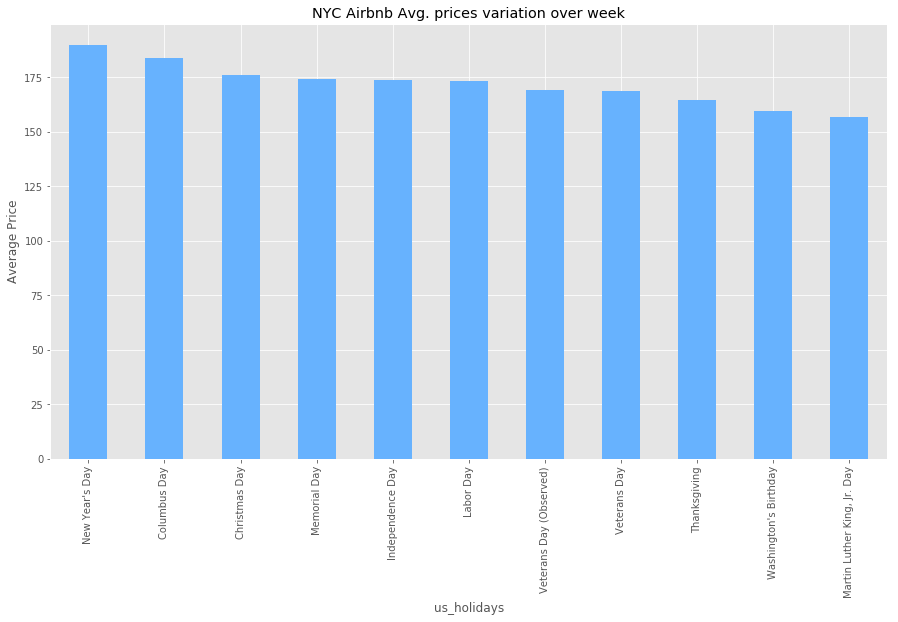

In [68]:
objects = holPriceDf['us_holidays']
y_pos = holPriceDf['price']

holPriceDf.plot(kind='bar', 
           x='us_holidays',
           y='price',
           color = '#67b2fe', 
           figsize =(15,8), 
           title = 'NYC Airbnb Avg. prices variation over week', 
           legend = False)
plt.ylabel('Average Price')

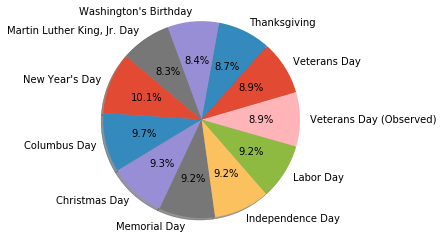

In [69]:
# Plot
plt.pie(y_pos, labels=objects, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [16]:
%matplotlib inline
import pandas as pd
import numpy as np
from collections import Counter


inputDF = pd.read_csv('listings_detail.csv')

inputDF=inputDF[['id','longitude','latitude','instant_bookable','security_deposit','neighbourhood','cleaning_fee',
                 'extra_people','maximum_nights','minimum_nights','host_id','host_response_time','zipcode',
                 'room_type','accommodates','bathrooms','bedrooms','beds','cancellation_policy','price']]

In [18]:
inputDF.head()

,id,longitude,latitude,instant_bookable,security_deposit,neighbourhood,cleaning_fee,extra_people,maximum_nights,minimum_nights,host_id,host_response_time,zipcode,room_type,accommodates,bathrooms,bedrooms,beds,cancellation_policy,price
0,18461891,-73.916246,40.774142,f,$250.00,Astoria,$85.00,$0.00,6,6,916092,NaN,11105,Entire home/apt,2,1.0,0.0,1.0,strict,$110.00
1,20702398,-73.786509,40.849191,f,$500.00,City Island,$20.00,$0.00,21,1,1457680,within an hour,NaN,Private room,2,1.0,1.0,1.0,moderate,$50.00
2,6627449,-73.786609,40.849775,f,NaN,City Island,$75.00,$0.00,21,3,13886510,within an hour,10464,Entire home/apt,3,1.0,1.0,1.0,strict,$125.00
3,19949243,-73.782276,40.848838,t,$0.00,The Bronx,$30.00,$0.00,1125,3,1149260,within a few hours,10464,Entire home/apt,4,1.0,1.0,3.0,strict,$100.00
4,1886820,-73.783052,40.841144,f,$800.00,City Island,$100.00,$25.00,90,7,9815788,NaN,10464,Entire home/apt,4,3.0,3.0,3.0,strict,$300.00


In [70]:
airbnb_data = pd.DataFrame(pd.read_csv("calendar_detail.csv"))

,column_name,missing_count,filling_factor
0,price,10600264,34.496077
1,listing_id,0,100.000000
2,date,0,100.000000
3,available,0,100.000000
